In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.decomposition
import sklearn.impute
import geopandas
import pandas
import shapely
import numpy
import matplotlib.pyplot as plt

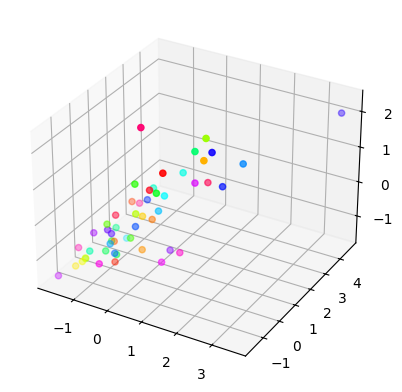

In [2]:
# Read the US Map and the data
# Same as the code in the previous two lectures
map = geopandas.read_file("cb_2018_us_state_20m.zip")
data = pandas.read_csv("SASUMMARY__ALL_AREAS_1998_2022.csv")
sub = data.pivot(index = "GeoName", columns = "LineCode", values = "2021")
sub["NAME"] = sub.index
combined = map.merge(sub, how = "left", on = "NAME")[["NAME", "geometry", 11, 12, 13]]
features = combined[[11, 12, 13]]
impute = sklearn.impute.SimpleImputer(strategy = "mean")
impute.fit(features)
full = impute.transform(features)
scale = sklearn.preprocessing.StandardScaler()
scale.fit(full)
x = scale.transform(full)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")

In [3]:
# Compute the first principal component
pca = sklearn.decomposition.PCA(n_components = 1)
pca.fit(x)
pca.components_

array([[0.58589369, 0.59271993, 0.55264063]])

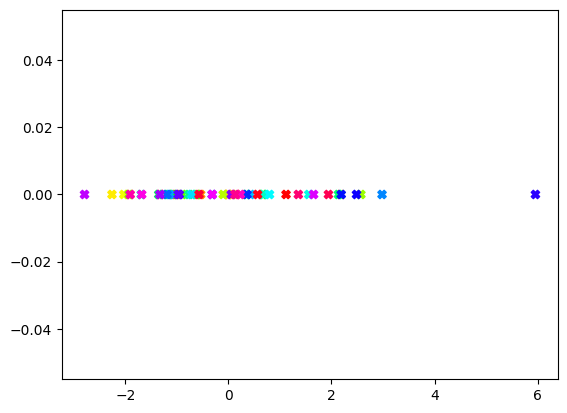

In [4]:
# Transform the points to the lower dimensional space
y = pca.transform(x)
plt.scatter(y, [0] * len(y), c = range(len(x)), cmap = "hsv", marker = "X")

(20.0, 50.0)

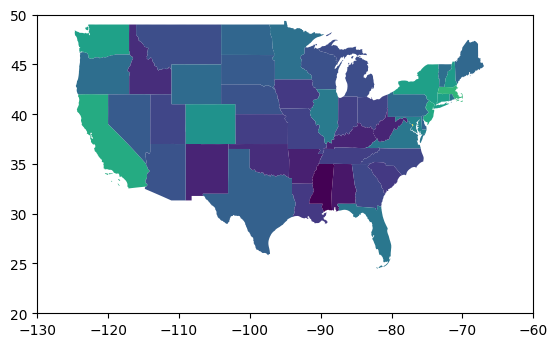

In [5]:
# Plot the values on the map
ax = map.plot(y[:, 0])
ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

In [6]:
# Test the algebra to compute the reconstruct
y_pred = x @ numpy.transpose(pca.components_)
numpy.hstack([y_pred, y])[:10, :]

array([[ 1.11849335e+00,  1.11849335e+00],
       [-1.32381819e+00, -1.32381819e+00],
       [-7.93548442e-03, -7.93548442e-03],
       [-1.01916656e+00, -1.01916656e+00],
       [ 1.56237549e-01,  1.56237549e-01],
       [-5.37849944e-01, -5.37849944e-01],
       [ 2.18061836e+00,  2.18061836e+00],
       [-1.03428292e-16,  1.07171798e-16],
       [-2.25932221e+00, -2.25932221e+00],
       [-2.03105861e+00, -2.03105861e+00]])

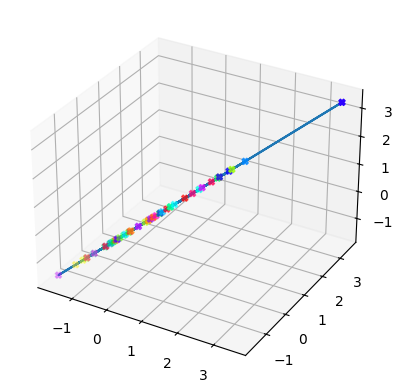

In [7]:
# Reconstruct the items and plot them
x_pred = y @ pca.components_ + pca.mean_
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")
ax.plot(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2])

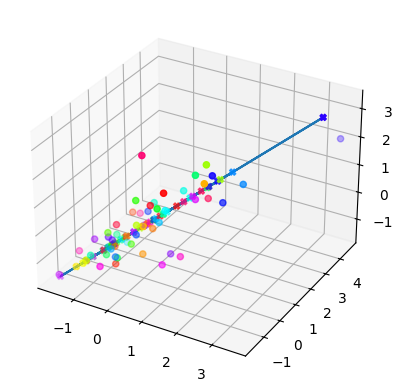

In [8]:
# Compare the reconstruction and the original points
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")
ax.plot(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2])